In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
from numpy import expand_dims
import pandas as pd
import os
import pandas as pd 

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications.mobilenet import preprocess_input
from IPython.display import Image

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras import optimizers

In [23]:
import os
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
data = pd.read_pickle('/content/gdrive/MyDrive/project/3_channel_128.pkl')
# data = pd.read_pickle('/content/gdrive/MyDrive/project/last_not_mean_centred.pkl')
# data = pd.read_pickle('/content/gdrive/MyDrive/project/final.pkl')

data1=data.to_numpy()
persons=data1[:,1]
values, counts = unique(persons, return_counts=True) # returns unique values in persons and their respective 
# frequency of occurence
for i in range(data1.shape[0]):
    data1[i][3]=int(data1[i][3]) 

In [ ]:
get_val_row_indices=where(persons=='p050')[0]
get_val_row_indices=append(get_val_row_indices,where(persons=='p015')[0])
get_val_row_indices=append(get_val_row_indices,where(persons=='p022')[0])
get_val_row_indices=append(get_val_row_indices,where(persons=='p056')[0])
val_data=array([data1[i] for i in get_val_row_indices]) # val_data is the validation data

# Ensuring that the validation data is randomly shuffed
# get_train_row_indices= where((persons!= 'p045') & (persons!='p072') & (persons!='p066') & (persons!='p035') & (persons!='p039') & (persons!='p041') )[0]
get_train_row_indices= where((persons!= 'p050') & (persons!='p015')  & (persons!='p022') & (persons!='p056') )[0]

print(len(get_train_row_indices),len(val_data))
train_data=array([data1[i] for i in get_train_row_indices]) # train_data is the training data
# Ensuring that the train data is randomly shuffed many times so as to make the training easier

18732 3692


In [ ]:
size = 128
batch_size = 64
channels = 3

In [ ]:
from keras.utils import np_utils
# !pip install pickle5
# import pickle5 as pickle
X_train=train_data[:,2]
X_train=array([X_train[i].reshape(128,128,channels)[...,::-1] for i in range(len(X_train))])
# X_train=array([X_train[i].reshape(size,size,channels) for i in range(len(X_train))])

y_train=train_data[:,3]  # The training class labels

X_val=val_data[:,2]
X_val=array([X_val[i].reshape(128,128,channels)[...,::-1] for i in range(len(X_val))])
# X_val=array([X_val[i].reshape(size,size,channels) for i in range(len(X_val))])

y_val1=val_data[:,3]  # The validation class labels

y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val1, 10)
# filename = "training.pkl"
# with open(filename, 'wb') as filehandler:
#     pickle.dump(X_train, filehandler)

In [3]:
test_data1 = pd.read_pickle('/content/gdrive/MyDrive/project/test_data.pkl')
test_data=test_data1.to_numpy()

In [4]:
image_names=test_data[:,0]   # Name of images
vectors=test_data[:,1]
X_test=array([vectors[i].reshape(128,128,3) for i in range(len(vectors))])   # 2d numpy arrays containing test images data

In [6]:
image_names

array(['img_96191.jpg', 'img_24463.jpg', 'img_57956.jpg', ...,
       'img_49123.jpg', 'img_3465.jpg', 'img_57121.jpg'], dtype=object)

# VGG16 - model 1

In [8]:
from keras.applications.vgg16 import preprocess_input, VGG16
import pandas as pd
import joblib
X_test11=joblib.load( "/content/gdrive/MyDrive/project/X_test11.pkl")

In [ ]:
#@title 0.43 log loss

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)


x = vgg(vgg16_input)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

# create a model object
model1 = Model(inputs = vgg16_input, outputs = prediction )
model1.load_weights('/content/gdrive/MyDrive/project/vgg_0.36__preproccessed_loss.h5')

58900480/58889256 [==============================] - 1s 0us/step


Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.6319068255687974


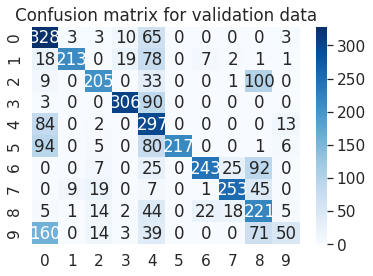

Class wise accuracies
Class 0 = 0.7961165048543689
Class 1 = 0.6283185840707964
Class 2 = 0.5890804597701149
Class 3 = 0.7669172932330827
Class 4 = 0.75
Class 5 = 0.5384615384615384
Class 6 = 0.6198979591836735
Class 7 = 0.7574850299401198
Class 8 = 0.6656626506024096
Class 9 = 0.14836795252225518


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model1_pred = model1.predict(X_val)
print('Images Predicted until now:',len(y_model1_pred))
y_model1_pred_class = argmax(y_model1_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model1_pred_class))
cm=confusion_matrix(y_val1, y_model1_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

In [ ]:
from sklearn.metrics import log_loss,accuracy_score
print('The accuracy of this model on validation set is:',accuracy_score(y_val1,y_model1_pred_class))

lgloss = log_loss(y_val1, y_model1_pred , eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('Log loss of this model is:',lgloss)

The accuracy of this model on validation set is: 0.6319068255687974
Log loss of this model is: 1.5755670573103246


# VGG16 - model 2

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8843445287107259


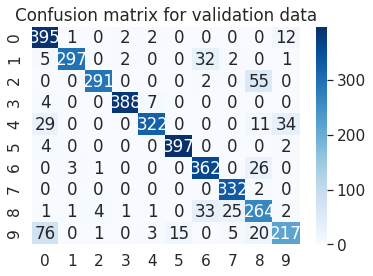

Class wise accuracies
Class 0 = 0.9587378640776699
Class 1 = 0.8761061946902655
Class 2 = 0.8362068965517241
Class 3 = 0.9724310776942355
Class 4 = 0.8131313131313131
Class 5 = 0.9851116625310173
Class 6 = 0.923469387755102
Class 7 = 0.9940119760479041
Class 8 = 0.7951807228915663
Class 9 = 0.6439169139465876


In [ ]:
model2 = Model(inputs = vgg16_input, outputs = prediction )
model2.load_weights('/content/gdrive/MyDrive/project/vgg_0.41__preproccessed_loss.h5')

from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model2_pred = model2.predict(X_val1)
print('Images Predicted until now:',len(y_model2_pred))
y_model2_pred_class = argmax(y_model2_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model2_pred_class))
cm=confusion_matrix(y_val1, y_model2_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

In [ ]:
from sklearn.metrics import log_loss,accuracy_score
print('The accuracy of this model on validation set is:',accuracy_score(y_val1,y_model2_pred_class))

lgloss = log_loss(y_val1, y_model2_pred , eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('Log loss of this model is:',lgloss)

The accuracy of this model on validation set is: 0.8843445287107259
Log loss of this model is: 0.4097835605452184


# VGG16 - model 3

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8659263271939328


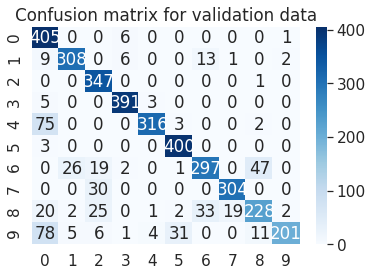

Class wise accuracies
Class 0 = 0.9830097087378641
Class 1 = 0.9085545722713865
Class 2 = 0.9971264367816092
Class 3 = 0.9799498746867168
Class 4 = 0.797979797979798
Class 5 = 0.9925558312655087
Class 6 = 0.7576530612244898
Class 7 = 0.9101796407185628
Class 8 = 0.6867469879518072
Class 9 = 0.5964391691394659


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)

x = vgg(vgg16_input)

x = Flatten()(x)
prediction = Dense(10, activation='softmax')(x)

model3 = Model(inputs = vgg16_input, outputs = prediction )
model3.load_weights('/content/gdrive/MyDrive/project/vgg_0.43__preproccessed_loss.h5')

from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model3_pred = model3.predict(X_val1)
print('Images Predicted until now:',len(y_model3_pred))
y_model3_pred_class = argmax(y_model3_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model3_pred_class))
cm=confusion_matrix(y_val1, y_model3_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# VGG16 - model 4




Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8629469122426869


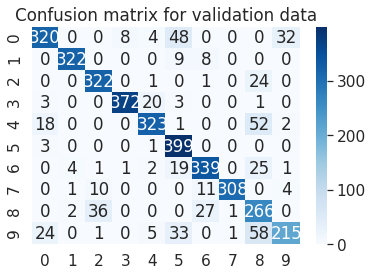

Class wise accuracies
Class 0 = 0.7766990291262136
Class 1 = 0.9498525073746312
Class 2 = 0.9252873563218391
Class 3 = 0.9323308270676691
Class 4 = 0.8156565656565656
Class 5 = 0.9900744416873449
Class 6 = 0.8647959183673469
Class 7 = 0.9221556886227545
Class 8 = 0.8012048192771084
Class 9 = 0.6379821958456974


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)

x = vgg(vgg16_input)

x = Flatten()(x)
prediction = Dense(10, activation='softmax')(x)

model4 = Model(inputs = vgg16_input, outputs = prediction )
model4.load_weights('/content/gdrive/MyDrive/project/vgg_0.45_loss.h5')

from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model4_pred = model4.predict(X_val1)
print('Images Predicted until now:',len(y_model4_pred))
y_model4_pred_class = argmax(y_model4_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model4_pred_class))
cm=confusion_matrix(y_val1, y_model4_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Resnet50 - model 5

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input


X_train1=preprocess_input(X_train)
X_val1=preprocess_input(X_val)

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
model5 = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
model5.load_weights('/content/gdrive/MyDrive/project/resnet_0.4677_loss_preprocessed.h5')

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8605092091007583


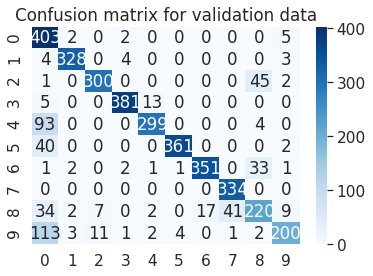

Class wise accuracies
Class 0 = 0.9781553398058253
Class 1 = 0.967551622418879
Class 2 = 0.8620689655172413
Class 3 = 0.9548872180451128
Class 4 = 0.7550505050505051
Class 5 = 0.8957816377171216
Class 6 = 0.8954081632653061
Class 7 = 1.0
Class 8 = 0.6626506024096386
Class 9 = 0.5934718100890207


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model5_pred = model5.predict(X_val1)
print('Images Predicted until now:',len(y_model5_pred))
y_model5_pred_class = argmax(y_model5_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model5_pred_class))
cm=confusion_matrix(y_val1, y_model5_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Resnet50 - model 6

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input


X_train1=preprocess_input(X_train)
X_val1=preprocess_input(X_val)

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
model6 = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
model6.load_weights('/content/gdrive/MyDrive/project/resnet_0.5_loss_preprocessed.h5')

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8713434452871073


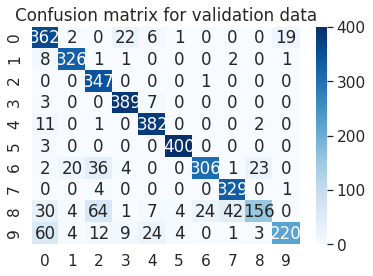

Class wise accuracies
Class 0 = 0.8786407766990292
Class 1 = 0.9616519174041298
Class 2 = 0.9971264367816092
Class 3 = 0.974937343358396
Class 4 = 0.9646464646464646
Class 5 = 0.9925558312655087
Class 6 = 0.7806122448979592
Class 7 = 0.9850299401197605
Class 8 = 0.46987951807228917
Class 9 = 0.6528189910979229


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model6_pred = model6.predict(X_val1)
print('Images Predicted until now:',len(y_model6_pred))
y_model6_pred_class = argmax(y_model6_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model6_pred_class))
cm=confusion_matrix(y_val1, y_model6_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Mobilenet - model 7




In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

X_train2=preprocess_input(X_train)
X_val2=preprocess_input(X_val)

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
baseModel.summary()
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
# headModel = Dense(256, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(256, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model7 = Model(inputs=baseModel.input, outputs=headModel)
model7.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.3907_loss_preprocessed.h5")

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8748645720476707


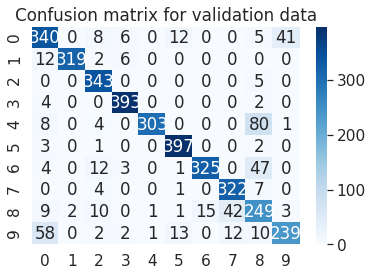

Class wise accuracies
Class 0 = 0.8252427184466019
Class 1 = 0.9410029498525073
Class 2 = 0.985632183908046
Class 3 = 0.9849624060150376
Class 4 = 0.7651515151515151
Class 5 = 0.9851116625310173
Class 6 = 0.8290816326530612
Class 7 = 0.9640718562874252
Class 8 = 0.75
Class 9 = 0.7091988130563798


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model7_pred = model7.predict(X_val2)
print('Images Predicted until now:',len(y_model7_pred))
y_model7_pred_class = argmax(y_model7_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model7_pred_class))
cm=confusion_matrix(y_val1, y_model7_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Mobilenet model 8

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

X_train2=preprocess_input(X_train)
X_val2=preprocess_input(X_val)

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
baseModel.summary()
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model8 = Model(inputs=baseModel.input, outputs=headModel)
model8.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.37_loss_preprocessed.h5")

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.8924702058504875


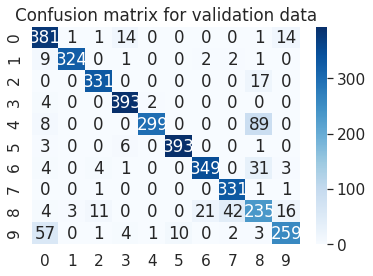

Class wise accuracies
Class 0 = 0.9247572815533981
Class 1 = 0.9557522123893806
Class 2 = 0.9511494252873564
Class 3 = 0.9849624060150376
Class 4 = 0.7550505050505051
Class 5 = 0.9751861042183623
Class 6 = 0.8903061224489796
Class 7 = 0.9910179640718563
Class 8 = 0.7078313253012049
Class 9 = 0.7685459940652819


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model8_pred = model8.predict(X_val2)
print('Images Predicted until now:',len(y_model8_pred))
y_model8_pred_class = argmax(y_model8_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model8_pred_class))
cm=confusion_matrix(y_val1, y_model8_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Mobilenet model 9

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# X_train2=preprocess_input(X_train)
# X_val2=preprocess_input(X_val)

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
baseModel.summary()
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model9 = Model(inputs=baseModel.input, outputs=headModel)
model9.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.3475_loss_preprocessed.h5")

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.9008667388949079


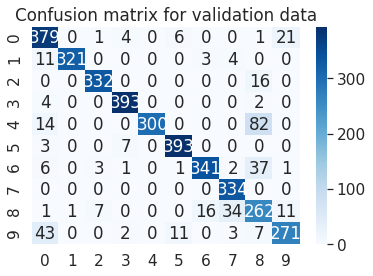

Class wise accuracies
Class 0 = 0.9199029126213593
Class 1 = 0.9469026548672567
Class 2 = 0.9540229885057471
Class 3 = 0.9849624060150376
Class 4 = 0.7575757575757576
Class 5 = 0.9751861042183623
Class 6 = 0.8698979591836735
Class 7 = 1.0
Class 8 = 0.7891566265060241
Class 9 = 0.8041543026706232


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model9_pred = model9.predict(X_val2)
print('Images Predicted until now:',len(y_model9_pred))
y_model9_pred_class = argmax(y_model9_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model9_pred_class))
cm=confusion_matrix(y_val1, y_model9_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Mobilenet model 10

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# X_train2=preprocess_input(X_train)
# X_val2=preprocess_input(X_val)

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model10 = Model(inputs=baseModel.input, outputs=headModel)
model10.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.3407_loss_preprocessed.h5")

Images Predicted until now: 3692
The accuracy of this model over validation set is: 0.902762730227519


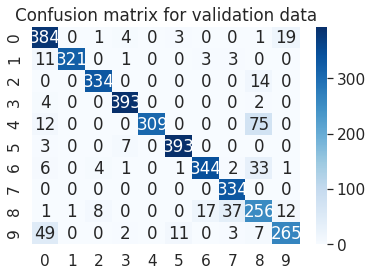

Class wise accuracies
Class 0 = 0.9320388349514563
Class 1 = 0.9469026548672567
Class 2 = 0.9597701149425287
Class 3 = 0.9849624060150376
Class 4 = 0.7803030303030303
Class 5 = 0.9751861042183623
Class 6 = 0.8775510204081632
Class 7 = 1.0
Class 8 = 0.7710843373493976
Class 9 = 0.7863501483679525


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_val1=y_val1.astype('int')
y_model10_pred = model10.predict(X_val2)
print('Images Predicted until now:',len(y_model10_pred))
y_model10_pred_class = argmax(y_model10_pred, axis=1)
print('The accuracy of this model over validation set is:',accuracy_score(y_val1,y_model10_pred_class))
cm=confusion_matrix(y_val1, y_model10_pred_class)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

# Mean Trimmed Ensembling 


In [ ]:
from statistics import mean
# For Trimmed Mean
ensemble_predictions = []
predictions = []

for i in range(len(X_val)):
    mean_prediction = []
    average_pred=[]
    for j in range(10):
        predictions = []
        predictions.append(y_model1_pred[i][j])
        predictions.append(y_model2_pred[i][j])
        predictions.append(y_model3_pred[i][j])
        predictions.append(y_model4_pred[i][j])
        predictions.append(y_model5_pred[i][j])
        predictions.append(y_model6_pred[i][j])
        # predictions.append(y_model7_pred[i][j])
        # predictions.append(y_model8_pred[i][j])
        predictions.append(y_model9_pred[i][j])
        predictions.append(y_model10_pred[i][j])

        trimmed_mean = (sum(predictions) - max(predictions) - min(predictions))/(len(predictions) - 2)
        predictions = []
        mean_prediction.append(trimmed_mean)


    average_pred=average_pred/sum(average_pred)
    ensemble_mean_pred.append(average_pred)
    mean_prediction = mean_prediction/ sum(mean_prediction)
    ensemble_predictions.append(mean_prediction)
        
ensemble_predictions = array(ensemble_predictions)

The accuracy of this model on validation set is: 0.9268689057421452
Log loss of this model is: 0.22665466303130505


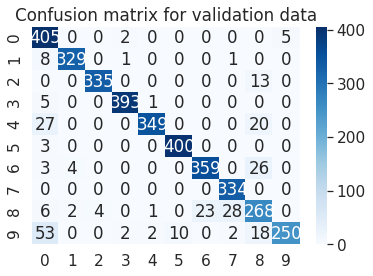

Class wise accuracies
Class 0 = 0.9830097087378641
Class 1 = 0.9705014749262537
Class 2 = 0.9626436781609196
Class 3 = 0.9849624060150376
Class 4 = 0.8813131313131313
Class 5 = 0.9925558312655087
Class 6 = 0.9158163265306123
Class 7 = 1.0
Class 8 = 0.8072289156626506
Class 9 = 0.7418397626112759


In [ ]:
print('The accuracy of this model on validation set is:',accuracy_score(y_val1,ensemble_class_pred))

from sklearn.metrics import log_loss
lgloss = log_loss(y_val1, ensemble_predictions , eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('Log loss of this model is:',lgloss)

cm=confusion_matrix(y_val1, ensemble_class_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True,cmap="Blues", fmt="d") 
plt.title("Confusion matrix for validation data")
plt.show()
print("Class wise accuracies")
for i in range(10):
  acc=cm[i][i]/sum(cm[i])
  print("Class {} = {}".format(i,acc))

In [ ]:
from sklearn.metrics import log_loss,accuracy_score
print('The accuracy of this model on validation set is:',accuracy_score(y_val1,ensemble_class_pred))

lgloss = log_loss(y_val1, ensemble_predictions , eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('Log loss of this model is:',lgloss)

The accuracy of this model on validation set is: 0.9268689057421452
Log loss of this model is: 0.22665466303130505


# KNN on Images


In [ ]:
test_data1 = pd.read_pickle('/content/gdrive/MyDrive/project/knn_val.pkl')
data1=test_data1.to_numpy()

In [ ]:
persons=data1[:,1]
values, counts = unique(persons, return_counts=True) # returns unique values in persons and their respective 
# frequency of occurence
for i in range(data1.shape[0]):
    data1[i][3]=int(data1[i][3]) 

In [ ]:
get_val_row_indices=where(persons=='p050')[0]
get_val_row_indices=append(get_val_row_indices,where(persons=='p015')[0])
get_val_row_indices=append(get_val_row_indices,where(persons=='p022')[0])
get_val_row_indices=append(get_val_row_indices,where(persons=='p056')[0])
val_data=array([data1[i] for i in get_val_row_indices]) # val_data is the validation data

# Ensuring that the validation data is randomly shuffed
# get_train_row_indices= where((persons!= 'p045') & (persons!='p072') & (persons!='p066') & (persons!='p035') & (persons!='p039') & (persons!='p041') )[0]
get_train_row_indices= where((persons!= 'p050') & (persons!='p015')  & (persons!='p022') & (persons!='p056') )[0]

print(len(get_train_row_indices),len(val_data))
train_data=array([data1[i] for i in get_train_row_indices]) # train_data is the training data
# Ensuring that the train data is randomly shuffed many times so as to make the training easier


18732 3692


In [ ]:
from keras.utils import np_utils

X_val=val_data[:,2]
y_val2=val_data[:,3]  # The validation class labels

y_val_knn = np_utils.to_categorical(y_val2, 10)

(-0.5, 39.5, 29.5, -0.5)

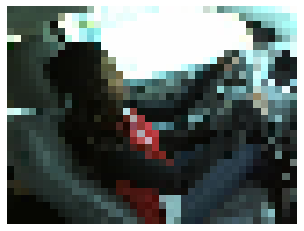

In [ ]:
plt.imshow(X_val[10].reshape(30,40,3))
plt.axis('off')

In [ ]:
X_val=array([[X_val[i][j] for j in range(len(X_val[0]))] for i in range(len(X_val)) ])

In [ ]:
X_val

In [ ]:
knn_input=X_val

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=10).fit(knn_input)
distances, indices = nbrs.kneighbors(knn_input)

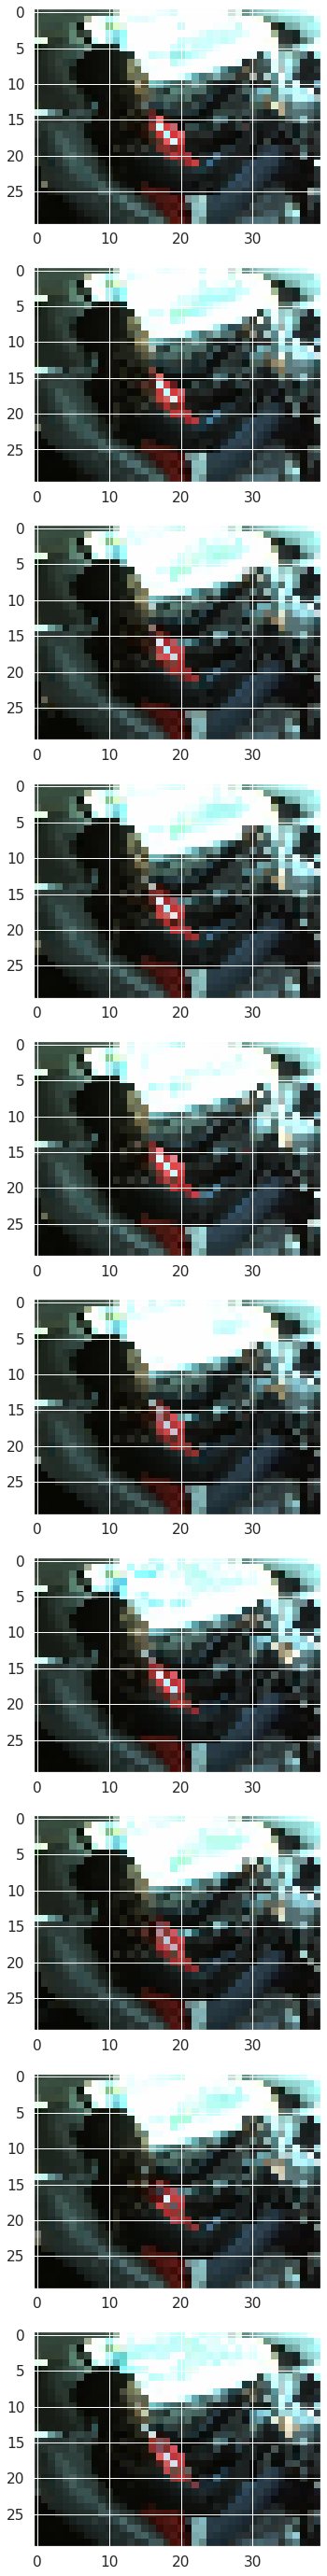

In [ ]:
fig, ax = plt.subplots(10, 1, figsize = (50,50))

img = 0

for i in indices[0]:  
    ax[img].imshow(X_val[i].reshape(30,40,3))
    plt.show
    img = img+1

In [ ]:
knn_predictions = []
predictions = []

for i in range(indices.shape[0]):
    mean_prediction = []
    for j in range(10):
        for k in indices[i]:
            predictions.append(ensemble_predictions[k][j])
        
        trimmed_value = (sum(predictions) - max(predictions) - min(predictions))/(len(predictions) -2 )
        mean_value = mean(predictions)
        predictions = []
        mean_prediction.append(trimmed_value)
    
    mean_prediction = mean_prediction/sum(mean_prediction)
    knn_predictions.append(mean_prediction)
            
knn_predictions = array(knn_predictions)           

In [ ]:
knn_class = []

for i in range(len(knn_predictions)):
    knn_class.append(where(knn_predictions[i] == amax(knn_predictions[i]))[0][0])

In [ ]:
knn_class=array(knn_class)
knn_class

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
from sklearn.metrics import log_loss,accuracy_score
y_val2=y_val2.astype('int')
print('The accuracy of this model over validation set is:',accuracy_score(y_val2,knn_class))
lgloss = log_loss(y_val2, knn_predictions, eps=1e-15, normalize=True, sample_weight=None, labels=None)
print('The log loss from this model is:',round(lgloss,2))

The accuracy of this model over validation set is: 0.9750812567713976
The log loss from this model is: 0.13
